In [257]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

g_label_fontsize = 16

colors = [
    "#5D7599",
    "#233142",
    "#F95959",
]

edgecolors = [
    "#FFFFFF",
    "#FFFFFF",
    "#FFFFFF",
]

hatches = ["\\\\", "", ""]

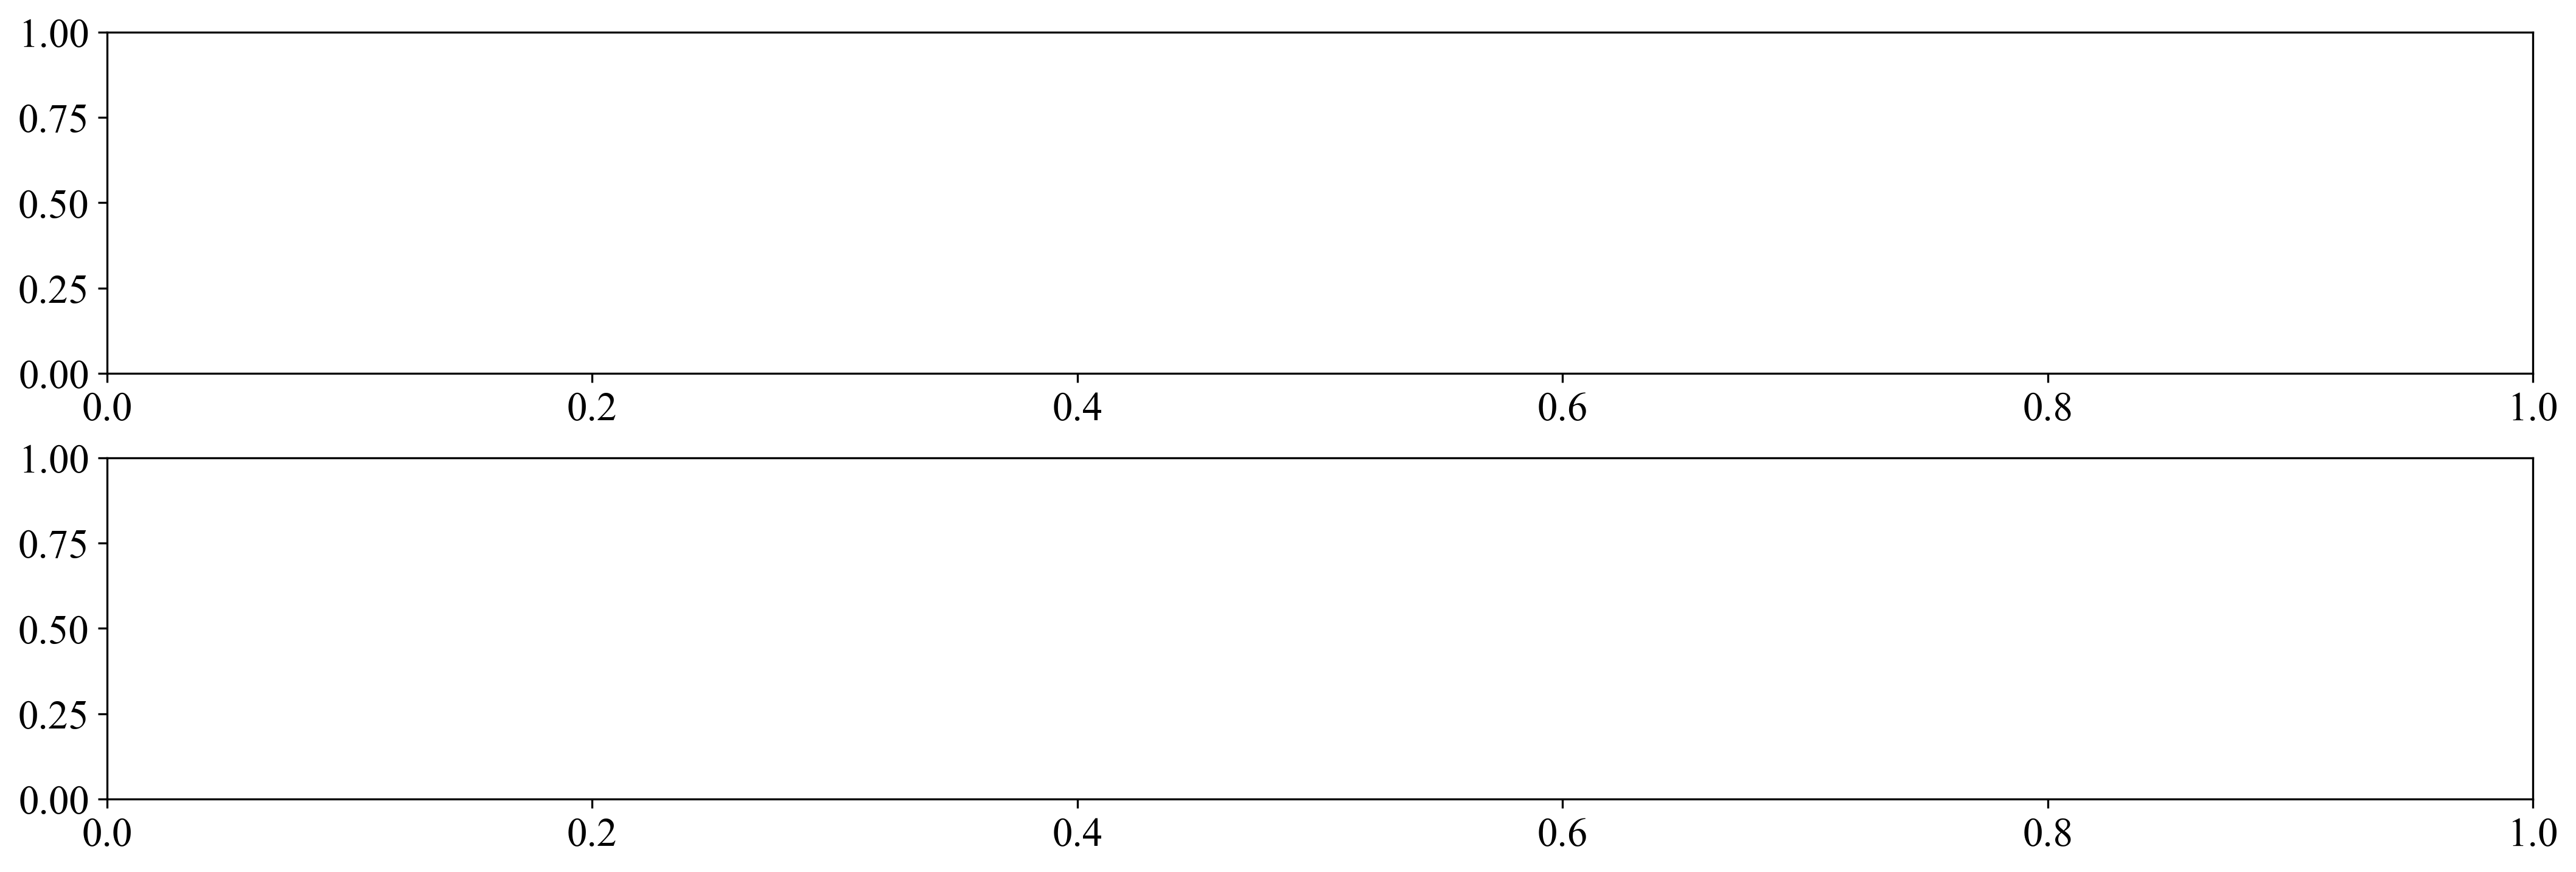

In [258]:
fig, ax = plt.subplots(
    figsize=(14, 14 / 3), ncols=1, nrows=2, constrained_layout=True, dpi=300
)

In [259]:
labels_name_a = [
    "ModelA\n8DP",
    "ModelA\n8TP",
    "ModelB\n8TP",
]
labels_name_c = [
    "ModelA\n2DP$\\times$4TP",
    "ModelA\n2DP$\\times$8TP",
    "ModelA\n4DP$\\times$2TP",
    "ModelB\n4DP$\\times$2TP",
]

In [260]:
# MFU
data_a = {
    labels_name_a[0]: [41.0, 34.2, 44.4],  # modela 8DP
    labels_name_a[1]: [26.2, 36.8, 43.6],  # modela 8TP
    labels_name_a[2]: [30.1, 39.6, 49.4],  # modelb 8tp
}
data_c = {
    labels_name_c[0]: [37.1, 30.4, 44.6],  # modela 2DP 4TP
    labels_name_c[1]: [39.6, 41.9, 0],  # modela 2DP 8TP
    labels_name_c[2]: [40.4, 30.5, 44.7],  # modela 4DP 2TP
    labels_name_c[3]: [-1, 31.7, 38.0],  # modeb 4DP 2TP
}

In [261]:
legend_labels = ["Megatron-LM", "XLA", "DLRover-Lynx"]

In [262]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_a.keys())
x_label_group_cnt = 3

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [ ]:
label_set = set()
for idx, (x_label, y_data) in enumerate(data_a.items()):
    positions = group_positions[idx]
    tmp = sorted(y_data)[-2]
    ax[0].text(
        positions[2],
        y_data[2] + 2,
        f"$\\times${str(round(y_data[2]/tmp, 2))}",
        ha="center",
        color=colors[2],
    )
    for i, (pos, value, color, edgecolor, hatch, label) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
            legend_labels,
        )
    ):
        if label in label_set:
            local_label = None
        else:
            local_label = label
            label_set.add(local_label)
        ax[0].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax[0].set_xticks(list(group_centers.values()))
ax[0].set_xticklabels(list(data_a.keys()))

ax[0].set_ylim(0, 100)
ax[0].set_yticks([0, 50, 100])
ax[0].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[0].tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax[0].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[0].set_ylabel("MFU (%)", fontsize=g_label_fontsize)
ax[0].set_title("(a) Single parallel")

Text(0.5, 1.0, '(a) Single parallel')

In [264]:
bar_width = 0.2
group_spaing = 0.15

group_positions = {}
current_pos = 0

x_label_cnt = len(data_c.keys())
x_label_group_cnt = 3

for idx in range(x_label_cnt):
    group_positions[idx] = []
    for _ in range(x_label_group_cnt):
        group_positions[idx].append(current_pos)
        current_pos += bar_width
    current_pos += group_spaing

group_centers = {}
for idx, positions in group_positions.items():
    group_centers[idx] = sum(positions) / len(positions)

In [265]:
for idx, (x_label, y_data) in enumerate(data_c.items()):
    positions = group_positions[idx]
    tmp = sorted(y_data)[-2]
    ax[1].text(
        positions[2],
        y_data[2]+2,
        f"$\\times${str(round(y_data[2]/tmp, 2))}",
        ha="center",
        color=colors[2],
    )
    for i, (pos, value, color, edgecolor, hatch) in enumerate(
        zip(
            positions,
            y_data,
            colors,
            edgecolors,
            hatches,
        )
    ):
        if value == -1:
            ax[1].text(
                pos,
                1,
                "OOM$\\times$",
                rotation=90,
                ha="center",
                va="bottom",
                color="red",
            )
        ax[1].bar(
            pos,
            value,
            width=bar_width,
            color=color,
            label=local_label,
            hatch=hatch,
            edgecolor=edgecolor,
        )

ax[1].set_xticks(list(group_centers.values()))
ax[1].set_xticklabels(list(data_c.keys()))

ax[1].set_ylim(0, 100)
ax[1].set_yticks([0, 50, 100])
ax[1].set_yticklabels(["0", "50", "100"], rotation=90, ha="center", va="center")

ax[1].tick_params(axis="x", bottom=False, labelsize=g_label_fontsize, pad=1)
ax[1].tick_params(axis="y", left=True, labelsize=g_label_fontsize, pad=5)

ax[1].set_ylabel("MFU (%)", fontsize=g_label_fontsize)
ax[1].set_title("(c) Hybrid parallel")

Text(0.5, 1.0, '(c) Hybrid parallel')

In [266]:
fig.legend(
    ncol=3,
    loc="upper center",
    frameon=False,
    shadow=False,
    bbox_to_anchor=(0.5, 1.1),
    fontsize=g_label_fontsize,
)

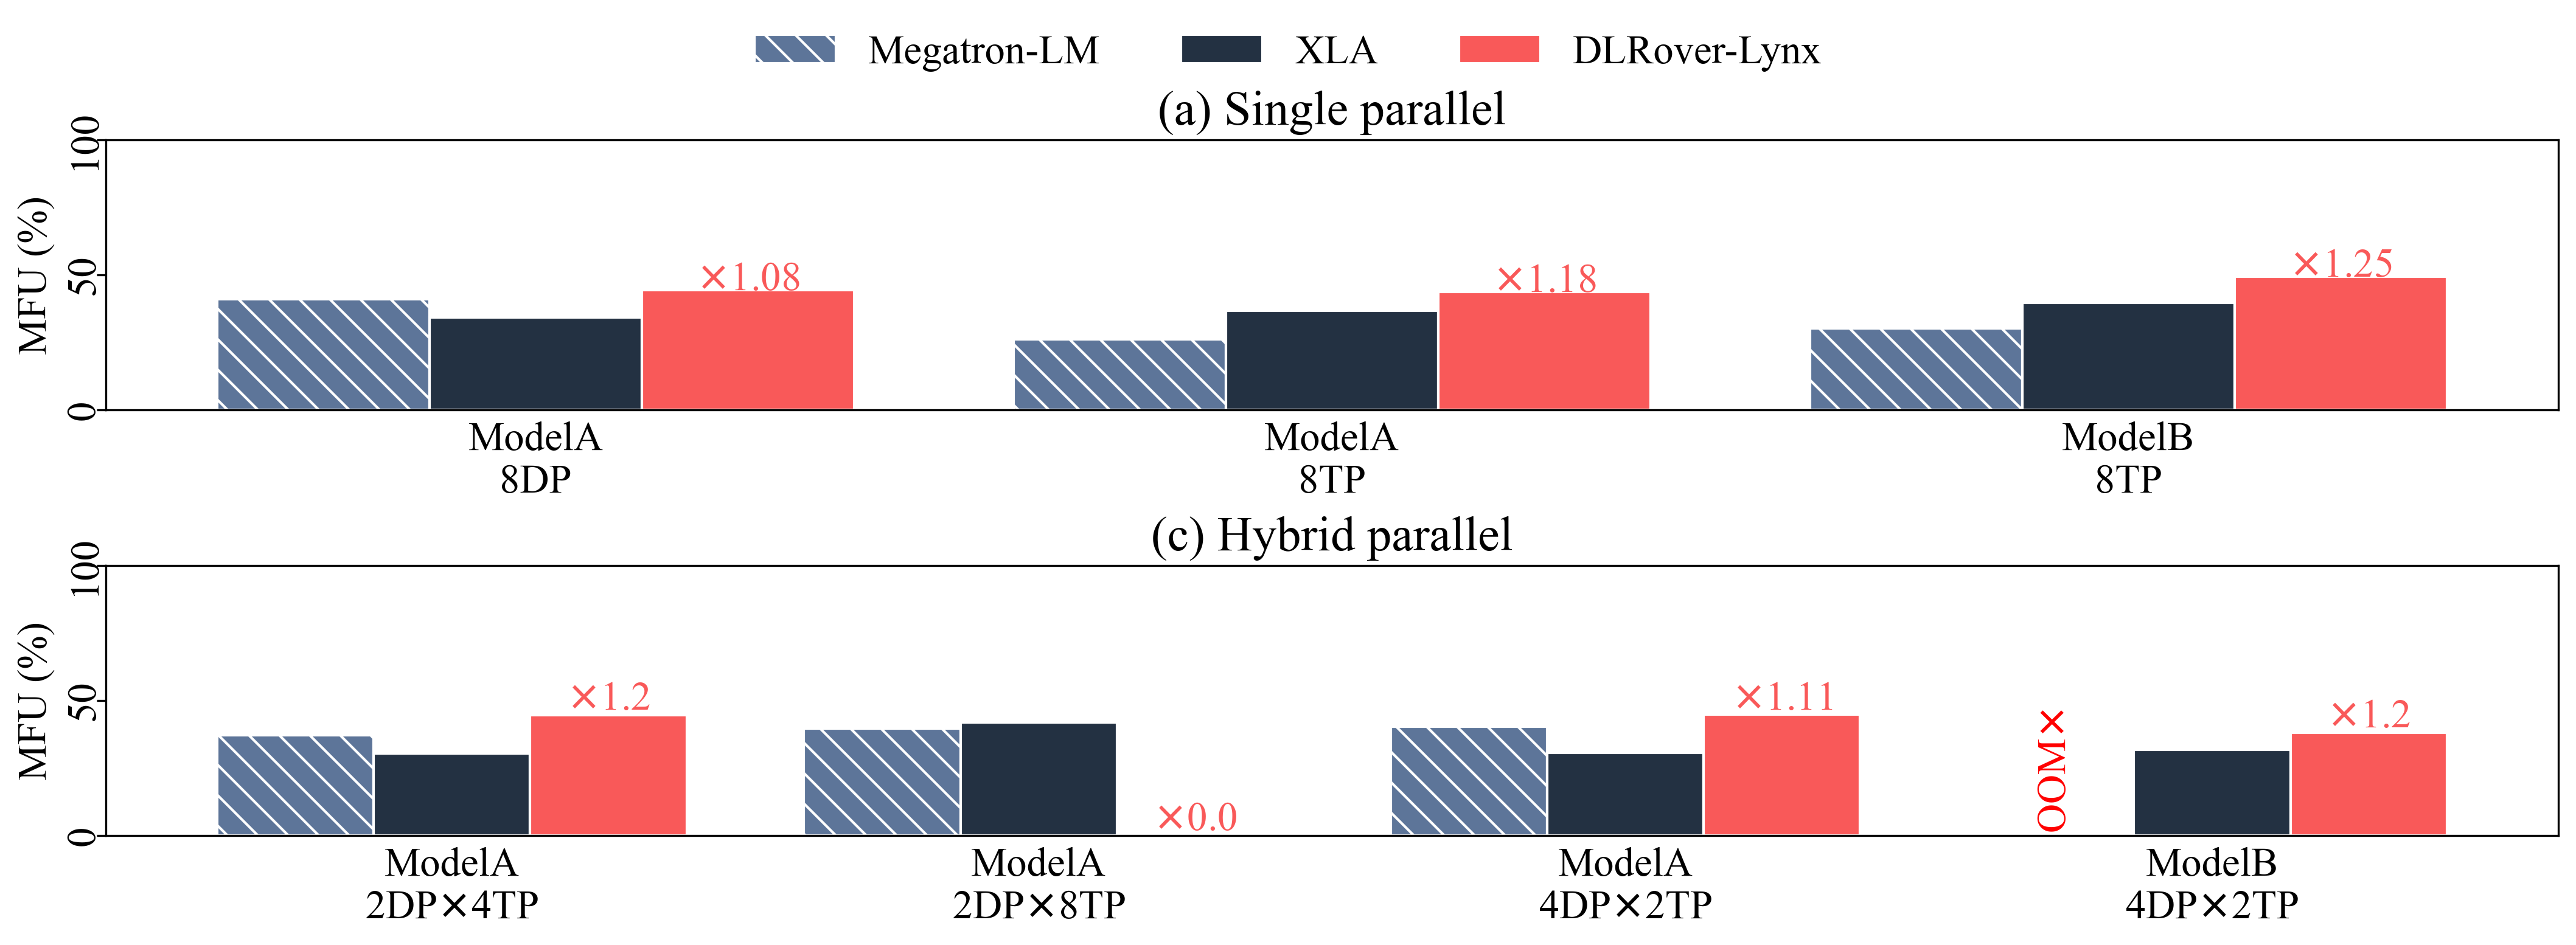

In [267]:
fig.savefig("end_to_end_mfu.pdf", bbox_inches="tight", dpi=1000)
fig